# MobileNetV2 - Pretrained

In [ ]:
# IMPORT
import tensorflow as tf
import numpy as np
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# PARAMETER
IMG_SIZE = (96, 96)
BATCH_SIZE = 32
EPOCHS = 10

TRAIN_DIR = "../dataset_split/train"
VAL_DIR   = "../dataset_split/val"
TEST_DIR  = "../dataset_split/test"
MODEL_DIR = "../models"

os.makedirs(MODEL_DIR, exist_ok=True)

# DATA GENERATOR
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    zoom_range=0.15,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

print("Loading TRAIN dataset...")
train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

print("Loading VALIDATION dataset...")
val_gen = val_test_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# MODEL: MOBILENETV2
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(96, 96, 3)
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.3)(x)

output = Dense(train_gen.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

# COMPILE
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Loading TRAIN dataset...
Found 6941 images belonging to 5 classes.
Loading VALIDATION dataset...
Found 2117 images belonging to 5 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 48, 48,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 48, 48,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 48, 48,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 48, 48,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 48, 48,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 48, 48,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 49, 49,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 24, 24,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 24, 24,    │      2,304 │ block_1_depthwis

 Total params: 2,340,293 (8.93 MB)

 Trainable params: 82,309 (321.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# TRAIN
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

# SAVE MODEL
MODEL_PATH = os.path.join(MODEL_DIR, "mobilenet_small_96.h5")
model.save(MODEL_PATH)

Epoch 1/10
 38/217 ━━━━━━━━━━━━━━━━━━━━ 1:00 336ms/step - accuracy: 0.3398 - loss: 1.8330

c:\Users\ASUS\UAP MACHINE LEARNING (ML)\.venv\Lib\site-packages\PIL\Image.py:1039: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


153/217 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step - accuracy: 0.4986 - loss: 1.3490

c:\Users\ASUS\UAP MACHINE LEARNING (ML)\.venv\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


217/217 ━━━━━━━━━━━━━━━━━━━━ 96s 418ms/step - accuracy: 0.7081 - loss: 0.8009 - val_accuracy: 0.9169 - val_loss: 0.2985
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 90s 413ms/step - accuracy: 0.8954 - loss: 0.3066 - val_accuracy: 0.9513 - val_loss: 0.1632
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 114s 528ms/step - accuracy: 0.9314 - loss: 0.2081 - val_accuracy: 0.9641 - val_loss: 0.1144
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 160s 738ms/step - accuracy: 0.9496 - loss: 0.1572 - val_accuracy: 0.9632 - val_loss: 0.1075
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 162s 745ms/step - accuracy: 0.9563 - loss: 0.1348 - val_accuracy: 0.9735 - val_loss: 0.0857
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 168s 775ms/step - accuracy: 0.9623 - loss: 0.1143 - val_accuracy: 0.9787 - val_loss: 0.0717
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 168s 776ms/step - accuracy: 0.9670 - loss: 0.1020 - val_accuracy: 0.9802 - val_loss: 0.0655
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 167s 771ms/step - accuracy: 0.9745 - loss: 0.0836

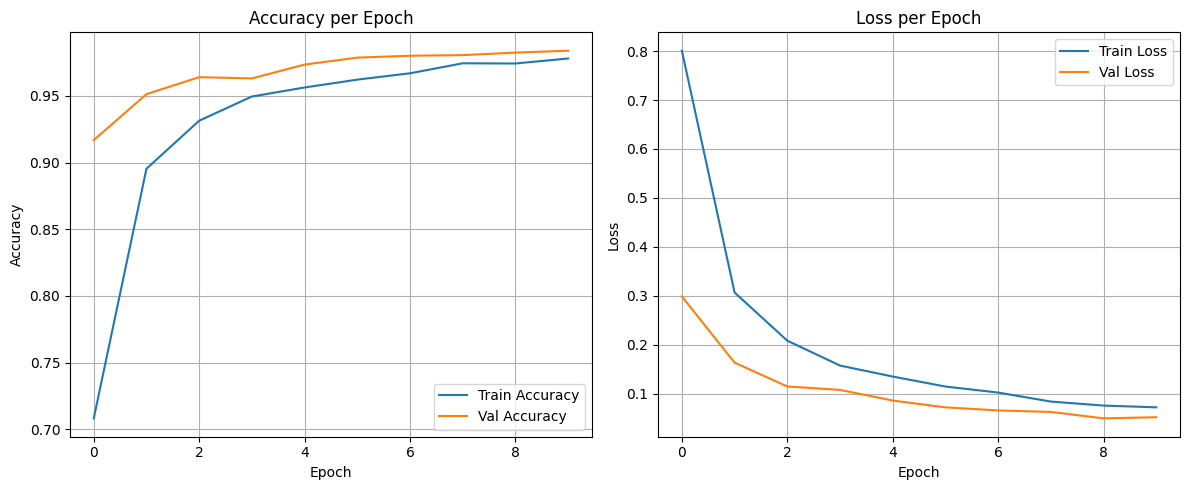

In [ ]:
# PLOT TRAINING HISTORY
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# CLASSIFICATION REPORT
from sklearn.metrics import classification_report

report = classification_report(
    y_true,
    y_pred,
    target_names=list(test_gen.class_indices.keys())
)

print("=== Classification Report MobileNetV2===")
print(report)


=== Classification Report MobileNetV2===
              precision    recall  f1-score   support

       apple       0.95      0.99      0.97       434
      banana       0.99      1.00      0.99       461
      grapes       0.99      0.95      0.97       434
      orange       0.98      0.99      0.99       394
  strawberry       1.00      0.99      0.99       406

    accuracy                           0.98      2129
   macro avg       0.98      0.98      0.98      2129
weighted avg       0.98      0.98      0.98      2129



c:\Users\ASUS\UAP MACHINE LEARNING (ML)\.venv\Lib\site-packages\PIL\Image.py:1039: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


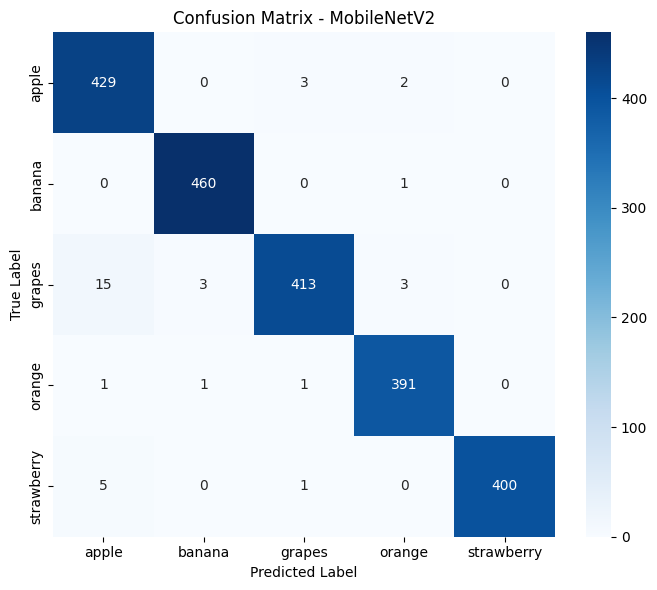

In [ ]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Reset generator
test_gen.reset()

# Prediksi
y_pred_prob = model.predict(test_gen, verbose=0)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = test_gen.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=test_gen.class_indices.keys(),
    yticklabels=test_gen.class_indices.keys()
)

plt.title("Confusion Matrix - MobileNetV2")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
